Lets start with importing the new `Class`/`function`:

In [58]:
from pliers.extractors import MFCCEnergyExtractor
from pliers.stimuli import AudioStim
from librosa import display

In [59]:
punk = 'Punk1.wav'

In [60]:
stim = AudioStim(punk)

In [61]:
stim.get_sampling_rate(punk)

44100

In [62]:
nBands = 48
nCoefs = 13
nMels = 48

In [63]:
# define dct-function like Hanke et al. for timbre, pitch and spectrum
def dct_II(N):
    # Create N x N matrix of discrete cosine transform coefficients
    # Uses DCT-II formula:https://en.wikipedia.org/wiki/Discrete_cosine_transform#DCT-II
    d = np.array([np.cos(np.pi / N * (np.arange(N) + 0.5) * k)
                  for k in np.arange(N)],
                 dtype='f4')
    d[0] *= 1 / np.sqrt(2)
    d *= np.sqrt(2.0 / N)
    return d

In [65]:
from librosa import load, feature
import numpy as np
y, sr = load(punk, sr=None)

DCT = dct_II(nBands)

mfs = feature.melspectrogram(y=y, sr=sr, n_mels=nMels)
mfcc = np.dot(DCT, 20 * np.log10(mfs + np.finfo(float).eps))

In [85]:
mfcc_2 = feature.mfcc(y=y, sr=sr, n_mfcc=nBands, n_mels=nMels)

In [128]:
# 1 LQ using michaels method
lq_mfs = np.dot(DCT[:nCoefs].T, mfcc[:nCoefs])
lq_mfs_norm = 10 ** (lq_mfs / 20.)

# 2 LQ from librosa MFCC + Michel's DCT method
lq_mfs_2 = np.dot(DCT[:nCoefs].T, mfcc_2[:nCoefs])
lq_mfs_norm_2 = 10 ** (lq_mfs_2 / 20.)

# 3 LQ from librosa MFCC + zeroing out + librosa inverse
lq_mfcc_2_zero = mfcc_2.copy()
lq_mfcc_2_zero[nCoefs:] = 0

lq_mfs_zero = feature.inverse.mfcc_to_mel(
    lq_mfcc_2_zero, nMels)

In [129]:
np.allclose(lq_mfs_norm, lq_mfs_norm_2)

False

In [130]:
np.allclose(lq_mfs_norm, lq_mfs_zero, 2)

True

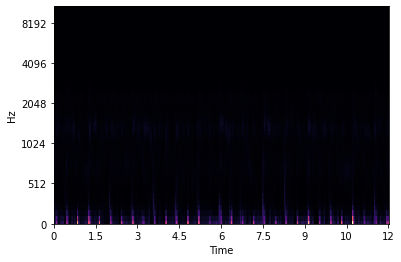

In [132]:
# Normalized LQ MFS using Hanke implementation

display.specshow(lq_mfs_norm, y_axis='mel', x_axis='time')

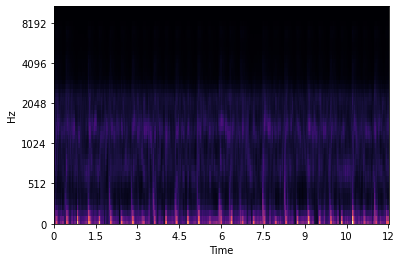

In [133]:
# Normalized LQ MFS using 2nd implementation

display.specshow(lq_mfs_norm_2, y_axis='mel', x_axis='time')

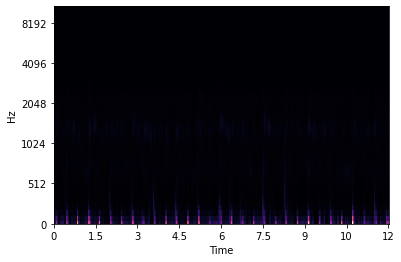

In [138]:
# Normalized LQ MFS using full librosa implementation

display.specshow(lq_mfs_zero, y_axis='mel', x_axis='time')

In [140]:
## HQ extraction
# 1 using michaels method
hq_mfs = np.dot(DCT[nCoefs:].T, mfcc[nCoefs:])
hq_mfs_norm = 10 ** (hq_mfs / 20.)

# 2 from librosa MFCC + Michel's DCT method
hq_mfs_2 = np.dot(DCT[nCoefs:].T, mfcc_2[nCoefs:])
hq_mfs_norm_2 = 10 ** (hq_mfs_2 / 20.)

# 3 from librosa MFCC + zeroing out + librosa inverse
hq_mfcc_2_zero = mfcc_2.copy()
hq_mfcc_2_zero[:nCoefs] = 0

hq_mfs_zero = feature.inverse.mfcc_to_mel(
    hq_mfcc_2_zero, nMels)

In [151]:
np.allclose(hq_mfs_norm, hq_mfs_norm_2, 8)

True

In [153]:
np.allclose(hq_mfs_norm, hq_mfs_zero, 3)

True

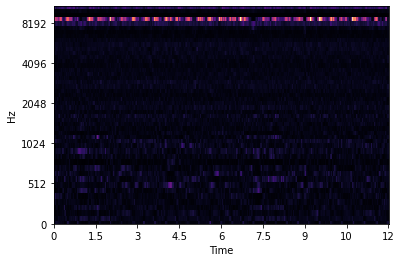

In [141]:
# Normalized HQ MFS using Hanke implementation

display.specshow(hq_mfs_norm, y_axis='mel', x_axis='time')

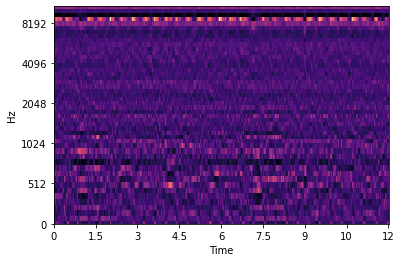

In [142]:
# MFCC + Michaels method

display.specshow(hq_mfs_norm_2, y_axis='mel', x_axis='time')

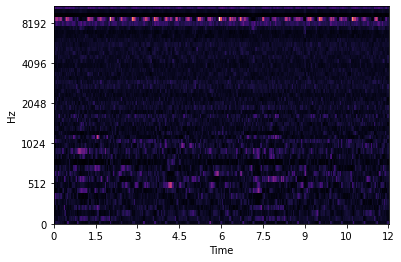

In [143]:
# Librosa zeroing out

display.specshow(hq_mfs_zero, y_axis='mel', x_axis='time')